### Генерация квадратичной функции

In [ ]:
import numpy as np

In [ ]:
def generate_quadratic_function(n, condition_number):
    # генерация случайной матрицы A размера n x n с заданным числом обусловленности
    U, s, V = np.linalg.svd(np.random.rand(n, n))
    S = np.diag(np.linspace(1, condition_number, n))
    A = U @ S @ V.T
    #print(A)

    A_inv = np.linalg.inv(A)
    #print("Норма матрицы A:", np.linalg.norm(A))
    #print("Норма обратной матрицы A^-1:", np.linalg.norm(A_inv))
    cond = np.linalg.norm(A) * np.linalg.norm(A_inv)
    #print("Число обусловленности матрицы A:", cond)
    
    # генерация случайного вектора b размера n x 1
    b = np.random.rand(n, 1)
    #print(b)
    
    # генерация случайного скаляра c
    c = np.random.rand()
    #print(c)
    
    # определение функции f(x) для полученных параметров
    def f(x):
      return x.T @ A @ x + b.T @ x + c
    
    # вывод полученной функции
    equation = f'({ A[0,0]:.2f}*x{0+1}**2) '
    for i in range(1, n):
      equation += f'+ ({ A[i,i]:.2f}*x{i+1}**2) '
      for j in range(i+1, n):
        equation += f'+ ({A[i,j]:.2f}*x{i+1}*x{j+1}) '
      equation += f'+ ({b[i,0]:.2f}*x{i+1}) '
    equation += f'+ ({c:.2f})'
    
    return str(equation)
from sympy import *
from sympy import diff, Symbol
import sympy.parsing.sympy_parser

print('Введите число переменных')
n = int(input())
print('Введите число обусловленности')
condition_number = int(input())
#user_string = generate_quadratic_function(n, condition_number)
user_string = generate_quadratic_function(n, condition_number)

#def parse_simbols(string):
 # my_symbols = {'x1': Symbol('x1', real=True)}
x = []

#def function(param):
   # my_symbols = {str(param): Symbol(param, real=True)}
   # return sympy.parsing.sympy_parser.parse_expr(user_string, my_symbols)

def dif_function(string):
    my_symbols = {string: Symbol(string, real=True)}
    my_func = sympy.parsing.sympy_parser.parse_expr(user_string, my_symbols)
    return diff(my_func, my_symbols[string])

Введите число переменных
2
Введите число обусловленности
3


In [ ]:
def changeparam(i):
  string = 'x' + str(i)
  return string
print(user_string)


(1.92*x1**2) + (-1.95*x2**2) + (0.87*x2) + (0.67)


### 3. Реализуйте метод наискорейшего спуска (‍с использованием метода одномерной оптимизации, такого как золотое сечение) 





**Проанализируйте траектории предложенных алгоритмов на примере квадратичных функций. Для этого придумайте две-три квадратичные функции от двух переменных на которых работа методов будет отличаться.**



In [ ]:
import sympy

def derivative(func_str, var_str):
    # Создаем символьную функцию из строки
    func = sympy.sympify(func_str)
    # Создаем символьную переменную из строки
    var = sympy.symbols(var_str)
    # Берем производную функции по переменной
    deriv = sympy.diff(func, var)
    # Преобразуем результат в строку и заменяем точки на запятые
    return str(deriv).replace('.', ',')


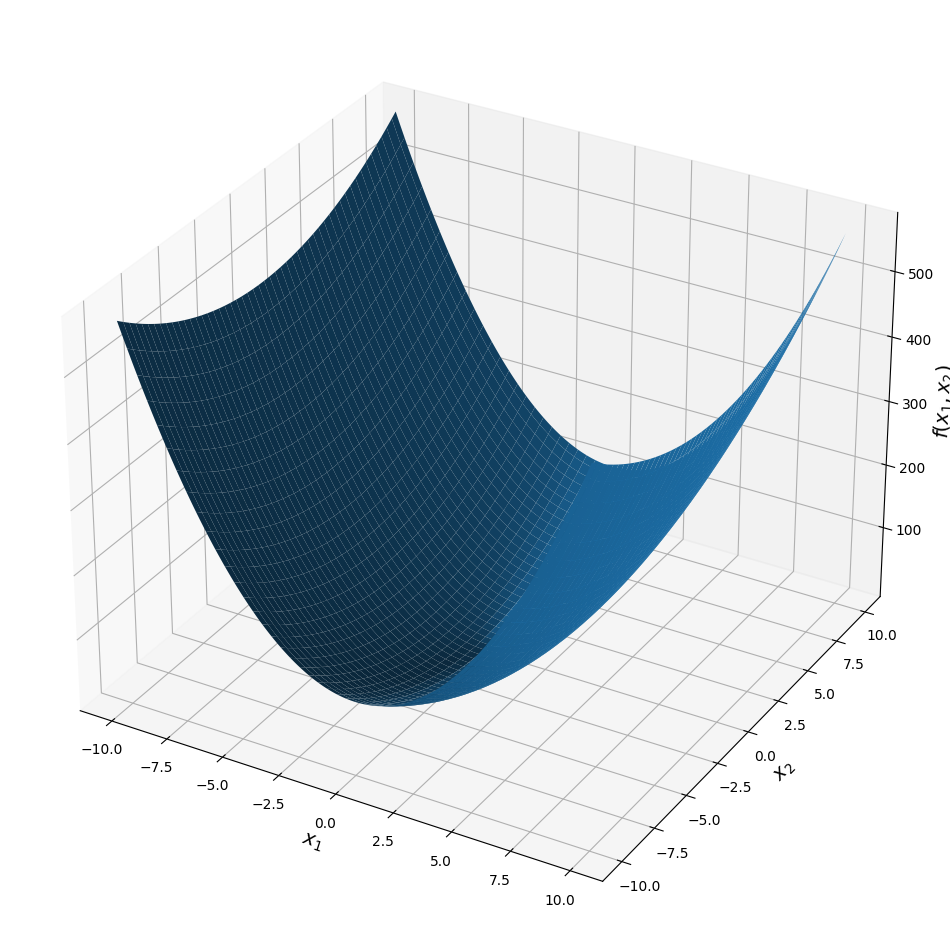

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

#Определяем функцию двух переменных
#Himmelblau
#user_string="(x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2"

#OUR
user_string="(4.70*x1**2) + (1.06*x2**2) + (0.30*x2) + (0.39)"

f1 = derivative(user_string, 'x1')
f2 = derivative(user_string, 'x2')
func = lambda x1, x2: eval(user_string)
funcx1 = lambda x1,x2 : eval(derivative(user_string, 'x1').replace(',', '.'))
funcx2 = lambda x1,x2 : eval(derivative(user_string, 'x2').replace(',', '.'))


#Задаем массив значений 
x1 = np.arange(-10, 10, 0.1)
x2 = np.arange(-10, 10, 0.1)

#Создаем сетки X1 и X2, представляющие собой матрицы всех возможных комбинаций значений из массивов 
X1, X2 = np.meshgrid(x1, x2)
#Вычисляем значения функции для всех пар значений из сеток X1 и X2
f = func(X1, X2)
fig = plt.figure(figsize=(12, 18)) # устанавливаем размер фигуры
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, f)
ax.set_xlabel(r'$x_1$', fontsize=14, weight='bold')
ax.set_ylabel(r'$x_2$',  fontsize=14, weight='bold')
ax.set_zlabel(r'$f(x_1, x_2)$',  fontsize=14, weight='bold')
plt.show()



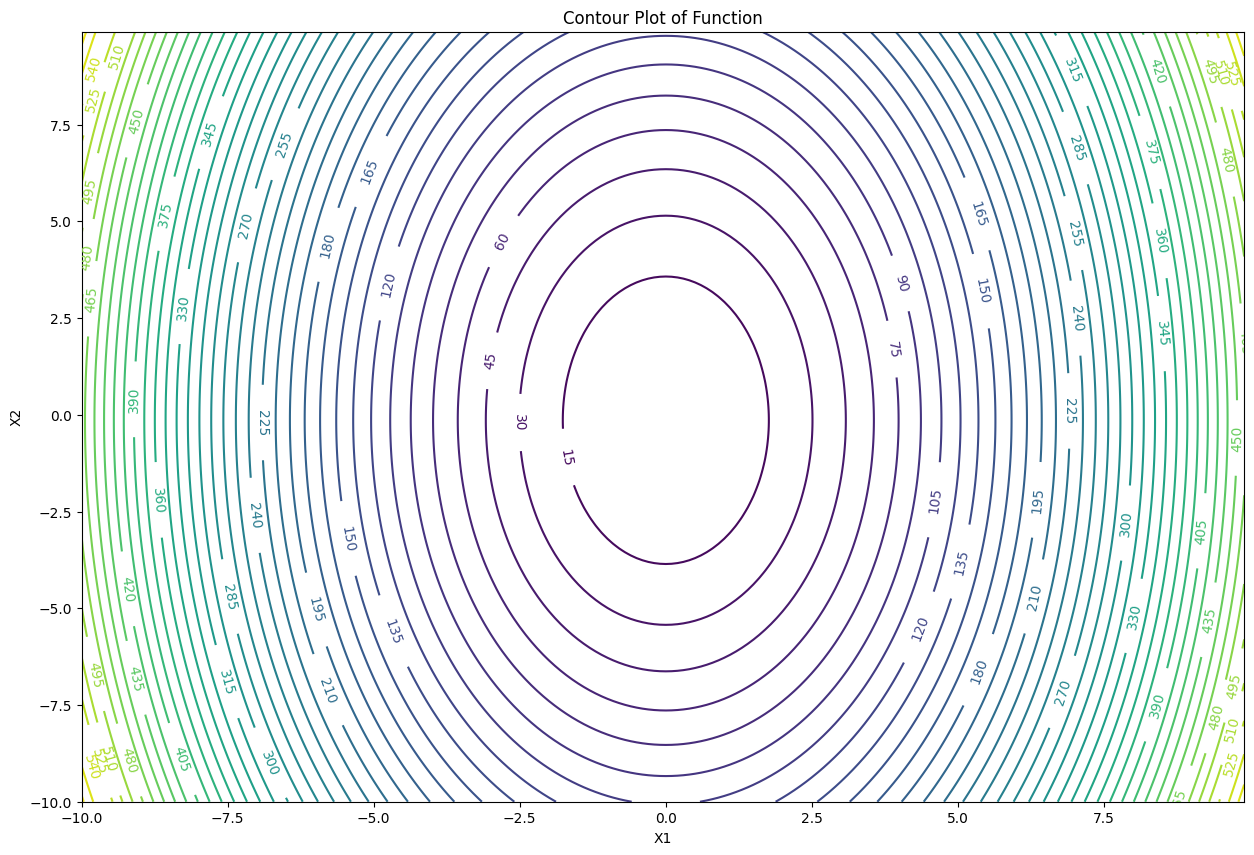

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
cs = ax.contour(X1, X2, f, 40)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)


Метод наискорейшего спуска (Steepest Descent Method) - это итерационный метод оптимизации, который используется для поиска минимума многомерной функции. Он основан на понятии направления наискорейшего убывания функции в заданной точке. 

Для использования этого метода необходимо знать частные производные функции f(x1,x2) по переменным x1 и x2, обозначенные как fx1 и fx2 соответственно. 

Алгоритм метода наискорейшего спуска состоит из следующих шагов:

1. Задать начальную точку ip = (x1,x2).
2. Вычислить частные производные функции f(x1,x2) по переменным x1 и x2, обозначенные как fx1 и fx2 соответственно.
3. Найти направление движения s1 и s2, которое является наискорейшим убыванием функции f(x1,x2) в заданной точке. Для этого необходимо взять отрицательные значения частных производных fx1 и fx2, так как функция убывает в направлении отрицательных значений производных.
4. Найти длину шага dstar в направлении s1 и s2, используя метод золотого сечения (golden_section). 
5. Перейти в новую точку (new_x1, new_x2), используя найденное направление движения и длину шага: new_x1 = x1 + dstar*s1, new_x2 = x2 + dstar*s2.
6. Проверить условие остановки: если разница между значениями функции f(x1,x2) на текущей и предыдущей итерациях меньше заданной точности epsilon, то остановить алгоритм. Иначе продолжить итерации.
7. Сохранить значения на каждой итерации в массив results.
 

In [ ]:
"""
    STEEPEST DESCENT METHOD
    It finds the point which is the global minimum of the two variable
    function. => f(x1,x2)
    
    f :      function we want to find global min.
    fx1 :    partial derivative of the function f with respect to x1
    fx2 :    partial derivative of the function f with respect to x2
    ip :     initial points where the algorithm is started
    maxN:    stopping condition, max. number of iterations that algorithm will work.
    epsilon: stopping condition, when difference between the value of f(x1,x2) in 
             two consecutive iteration is smaller then epsilon, we accept that algorithm
             is converged.
    
    return:  it returns an array where every value is stored while iterating.
"""
from scipy import optimize

def steepest_descent(f,fx1,fx2,ip,maxN,epsilon):
    results = []
    x1,x2 = ip
    diff = 10**10
    for i in range(maxN):
        # если разница между значениями на двух последовательных итерациях меньше epsilon,
        # то алгоритм останавливается
        if diff>epsilon:   
            # направление движения s1 и s2 - это отрицательные значения частных производных fx1 и fx2
            s1 = -fx1(x1,x2)
            s2 = -fx2(x1,x2)
            
            fd = lambda d: f(x1 + d*s1, x2 + d*s2)
            
            # dstar - длина шага в направлении s1 и s2, найденная с помощью метода Брента
            dstar = optimize.brent(fd, brack=(0, 100000))
            new_x1 = x1 + dstar*s1
            new_x2 = x2 + dstar*s2
            diff = abs(f(x1,x2)-f(new_x1,new_x2))
            # сохраняем округленные значения в целях визуализации
            results.append([i,round(x1,5),round(x2,5),round(s1,5),round(s2,5),round(f(x1,x2),10),round(dstar,5),diff])
            x1 = new_x1
            x2 = new_x2
        else:
            break
    return results

Заголовки в таблице отвечают за содержание каждого столбца. 

- 'Iteration' - номер итерации алгоритма
- 'x1' - значение переменной x1 на данной итерации
- 'x2' - значение переменной x2 на данной итерации
- 's1' - направление движения по переменной x1 на данной итерации (отрицательное значение частной производной f по x1)
- 's2' - направление движения по переменной x2 на данной итерации (отрицательное значение частной производной f по x2)
- 'f(x1,x2)' - значение функции на данной итерации
- 'dstar' - длина шага в направлении s1 и s2, найденная с помощью метода Брента
- 'diff = fnext-fcurrent' - разница между значением функции на текущей итерации и следующей (для определения критерия останова алгоритма)

  Iteration        x1        x2        s1         s2    f(x1,x2)    dstar    diff = fnext-fcurrent
-----------  --------  --------  --------  ---------  ----------  -------  -----------------------
          0  -5.5       5.5      51.7      -11.96     176.28      0.11074            155.918
          1   0.22524   4.17555  -2.11722   -9.15218   20.3625    0.40164             17.7213
          2  -0.62512   0.49969   5.87611   -1.35935    2.64122   0.11074              2.01416
          3   0.0256    0.34916  -0.24064   -1.04022    0.627055  0.40164              0.228925
          4  -0.07105  -0.06863   0.66787   -0.1545     0.398129  0.11074              0.0260192
          5   0.00291  -0.08574  -0.02735   -0.11823    0.37211   0.40164              0.00295729
          6  -0.00808  -0.13323   0.07591   -0.01756    0.369153  0.11074              0.000336118
          7   0.00033  -0.13517  -0.00311   -0.01344    0.368817  0.40164              3.82024e-05


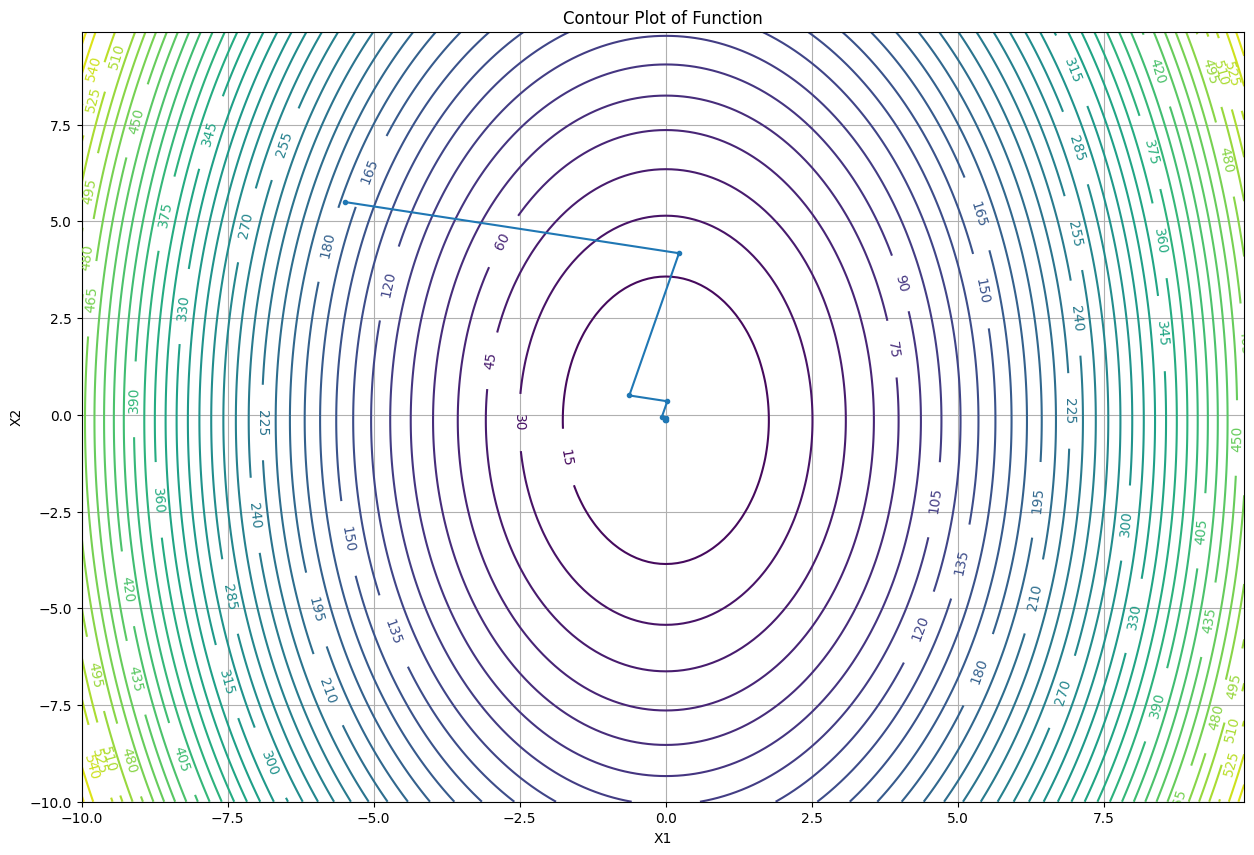

In [ ]:
from tabulate import tabulate
initial = [-5.5, 5.5]
sdr = steepest_descent(func,funcx1,funcx2,initial,10000,0.0001)
print(tabulate(sdr,headers=['Iteration','x1','x2','s1','s2','f(x1,x2)','dstar','diff = fnext-fcurrent']))
sdr = np.array(sdr)
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,50)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)
plt.plot(sdr[:,1],sdr[:,2],".-")
plt.grid()

  Iteration        x1        x2         s1         s2    f(x1,x2)    dstar    diff = fnext-fcurrent
-----------  --------  --------  ---------  ---------  ----------  -------  -----------------------
          0   9         8        -84.6      -17.26     451.33      0.10978            409.21
          1  -0.28743   6.10519    2.70182  -13.243     42.1196    0.41478             37.8854
          2   0.83324   0.61225   -7.83242   -1.59796    4.23414   0.10978              3.5075
          3  -0.02661   0.43682    0.25014   -1.22606    0.726636  0.41478              0.324731
          4   0.07714  -0.07173   -0.72514   -0.14794    0.401905  0.10978              0.0300642
          5  -0.00246  -0.08797    0.02316   -0.11351    0.371841  0.41478              0.0027834
          6   0.00714  -0.13505   -0.06713   -0.0137     0.369058  0.10978              0.000257692
          7  -0.00023  -0.13655    0.00214   -0.01051    0.3688    0.41478              2.38576e-05
          8   0.00066  -

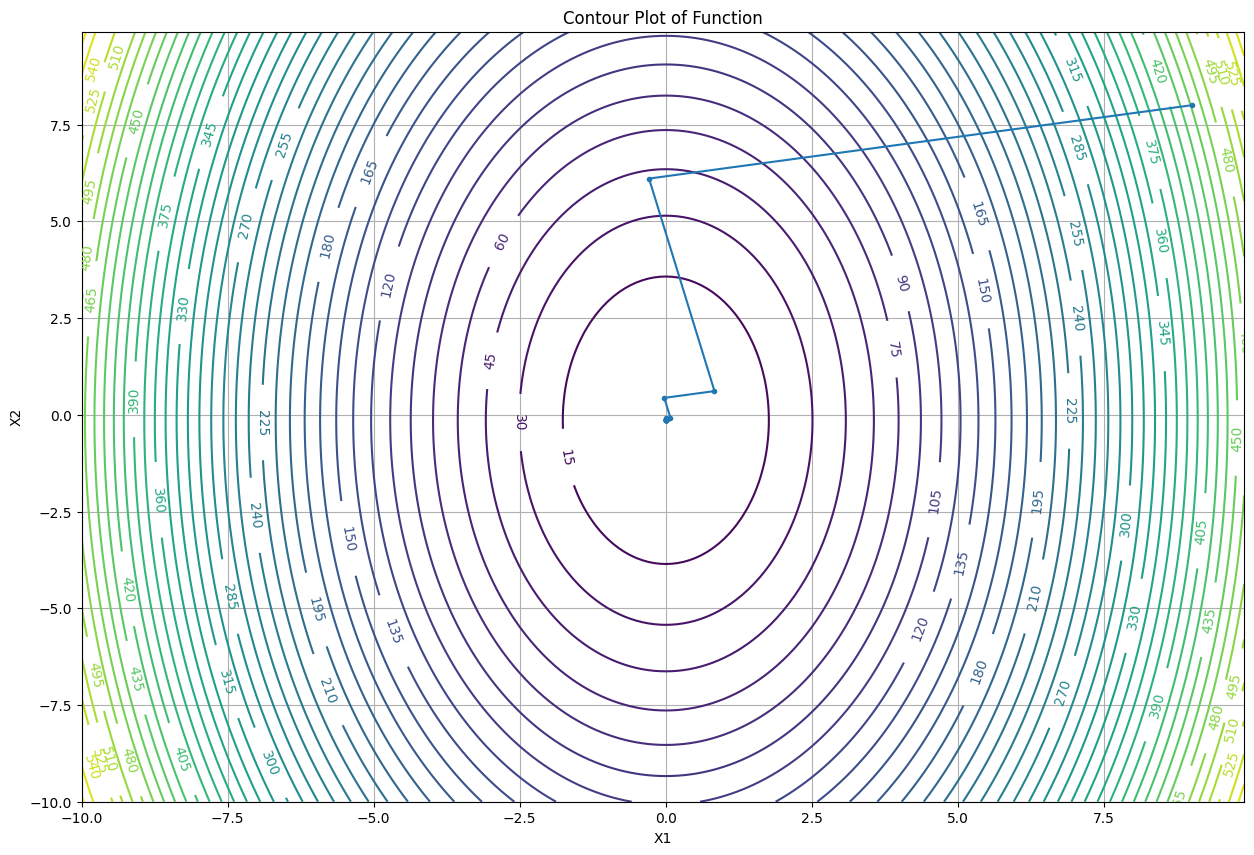

In [ ]:
initial = [9,8]
sdr = steepest_descent(func,funcx1,funcx2,initial,10000,0.00000000000000000001)
print(tabulate(sdr,headers=['Iteration','x1','x2','s1','s2','f(x1,x2)','dstar','diff = fnext-fcurrent']))
sdr = np.array(sdr)
fig,ax2 = plt.subplots()
cs = ax2.contour(X1,X2,f,50)
ax2.clabel(cs,inline=1,fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)
plt.plot(sdr[:,1],sdr[:,2],".-")
plt.grid()

### 4. Реализуйте метод сопряженных градиентов.





**Проанализируйте траектории предложенных алгоритмов на примере квадратичных функций. Для этого придумайте две-три квадратичные функции от двух переменных на которых работа методов будет отличаться.**

Метод сопряженных градиентов - это метод оптимизации, который используется для поиска экстремумов квадратичных функций. Он относится к классу методов без ограничений, то есть функция не имеет ограничений в области определения.

Теоретический подход метода сопряженных градиентов заключается в том, чтобы вычислять градиент функции в текущей точке и двигаться в направлении, противоположном градиенту. Если функция является квадратичной, то этот метод находит ее глобальный минимум за конечное число итераций.

Однако, если функция не является квадратичной, то метод сопряженных градиентов не гарантирует нахождения глобального минимума, как и другие методы оптимизации без ограничений.

Кроме того, эффективность метода во многом зависит от выбора начальной точки, так как сходимость метода к минимуму может быть медленной, если начальная точка находится далеко от минимума.

  Iteration        x1        x2        s1        s2    f(x1,x2)    alpha_star    diff = fnext-fcurrent
-----------  --------  --------  --------  --------  ----------  ------------  -----------------------
          0  -5.5       5.5      -0.49343  -9.52712  176.28           0.11073            155.918
          1   0.22483   4.17565  -0.01141   0.00065   20.3625         0.45318             19.9937
          2   0.00121  -0.14182   1e-05     0.00051    0.368781       0.10666              6.95887e-06


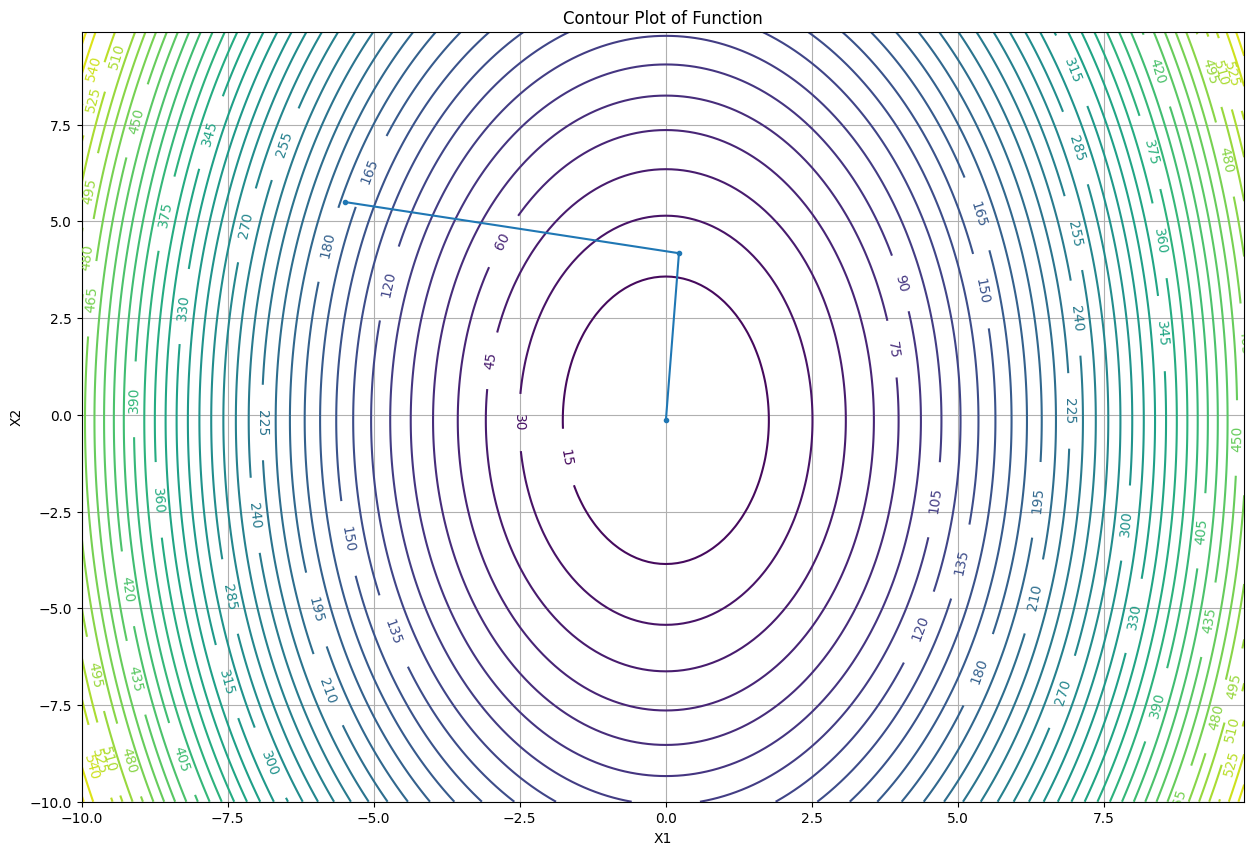

In [ ]:
# Пример использования метода сопряженных градиентов для минимизации функции

from sympy import *
import math
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

# Определяем функцию для поиска минимума методом золотого сечения
def golden_section(f, a, b, eps): 
  phi = 1 - (math.sqrt(5) - 1) / 2
  x1 = a + phi * (b - a)
  x2 = b - phi * (b - a)
  f1, f2 = f(x1), f(x2)
  while abs(b - a) > eps:   
    if f1 < f2:
        b, x2, f2 = x2, x1, f1
        x1 = a + phi * (b - a)
        f1 = f(x1)
    else:
        a, x1, f1 = x1, x2, f2
        x2 = b - phi * (b - a)
        f2 = f(x2)
  return (a + b) / 2

def conjugate_gradient(f, fx1, fx2, ip, maxN, epsilon):
    results = []
    x1, x2 = ip
    diff = 10**10
    # начальное направление движения - это отрицательный градиент в начальной точке
    s1 = -fx1(x1,x2)
    s2 = -fx2(x1,x2)
    for i in range(maxN):
        if diff>epsilon:
            # находим коэффициент аk, который минимизирует функцию f(xk + ask)
            fd = lambda d: f(x1 + d*s1, x2 + d*s2)
            a_star = golden_section(fd,0,100000,0.0001)
            #a_star = optimize.brent(fd, brack=(0, 100000))
            new_x1 = x1 + a_star*s1
            new_x2 = x2 + a_star*s2
            # вычисляем новое направление движения
            new_s1 = -fx1(new_x1,new_x2)
            new_s2 = -fx2(new_x1,new_x2)
            b = (new_s1**2 + new_s2**2)/(s1**2 + s2**2)
            s1 = new_s1 + b*s1
            s2 = new_s2 + b*s2
            diff = abs(f(x1,x2)-f(new_x1,new_x2))
            results.append([i,round(x1,5),round(x2,5),round(s1,5),round(s2,5),round(f(x1,x2),10),round(a_star,5),diff])
            x1 = new_x1
            x2 = new_x2
        else:
            break
    return results

# Задаем начальную точку и запускаем метод сопряженных градиентов
initial = [-5.5, 5.5]
cgr = conjugate_gradient(func, funcx1, funcx2, initial, 10000, 0.0001)

# Выводим результаты
print(tabulate(cgr, headers=['Iteration', 'x1', 'x2', 's1', 's2', 'f(x1,x2)', 'alpha_star', 'diff = fnext-fcurrent']))

# Визуализируем результаты
cgr = np.array(cgr)
fig, ax2 = plt.subplots()
cs = ax2.contour(X1, X2, f, 50)
ax2.clabel(cs, inline=1, fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)
plt.plot(cgr[:, 1], cgr[:, 2], ".-")
plt.grid()

- 'Iteration': номер итерации метода сопряженных градиентов
- 'x1': значение переменной x1 на данной итерации
- 'x2': значение переменной x2 на данной итерации
- 's1': значение направления движения по переменной x1 на данной итерации
- 's2': значение направления движения по переменной x2 на данной итерации
- 'f(x1,x2)': значение функции f(x1,x2) на данной итерации
- 'alpha_star': оптимальное значение коэффициента a, минимизирующее функцию f(xk + ask)
- 'diff = fnext-fcurrent': разница между значением функции на данной итерации и на следующей. Если эта разница меньше заданной точности epsilon, то метод останавливается.

  Iteration        x1        x2        s1         s2    f(x1,x2)    alpha_star    diff = fnext-fcurrent
-----------  --------  --------  --------  ---------  ----------  ------------  -----------------------
          0   9         8         0.63894  -13.6655   451.33           0.10979              409.21
          1  -0.28856   6.10496  -0.03258   -0.00153   42.1196         0.45705               41.7508
          2   0.00347  -0.14083   1e-05     -0.0011     0.368831       0.10655                5.669e-05


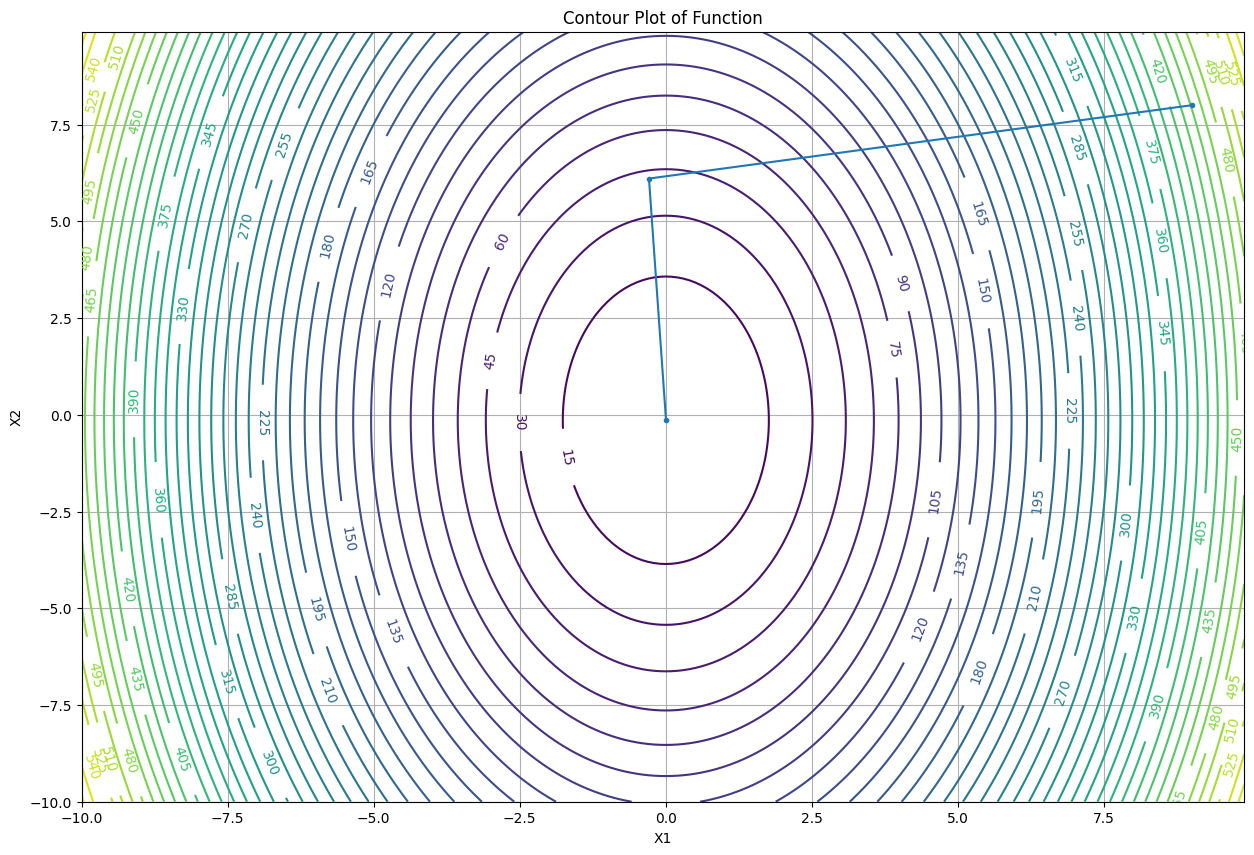

In [ ]:
# Задаем начальную точку и запускаем метод сопряженных градиентов
initial = [9,8]
cgr = conjugate_gradient(func, funcx1, funcx2, initial, 10000, 0.0001)

# Выводим результаты
print(tabulate(cgr, headers=['Iteration', 'x1', 'x2', 's1', 's2', 'f(x1,x2)', 'alpha_star', 'diff = fnext-fcurrent']))

# Визуализируем результаты
cgr = np.array(cgr)
fig, ax2 = plt.subplots()
cs = ax2.contour(X1, X2, f, 50)
ax2.clabel(cs, inline=1, fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Contour Plot of Function')
plt.gcf().set_size_inches(15, 10)
plt.plot(cgr[:, 1], cgr[:, 2], ".-")
plt.grid()

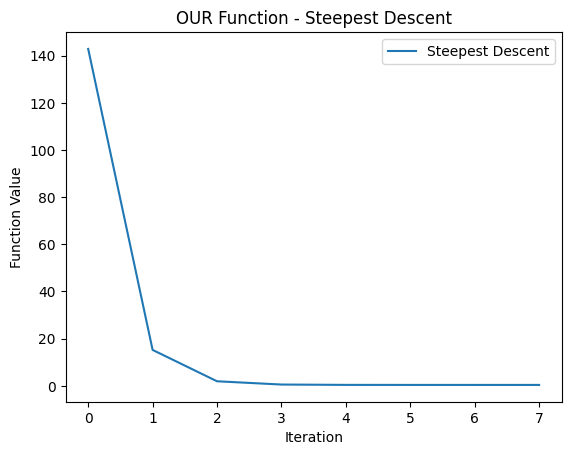

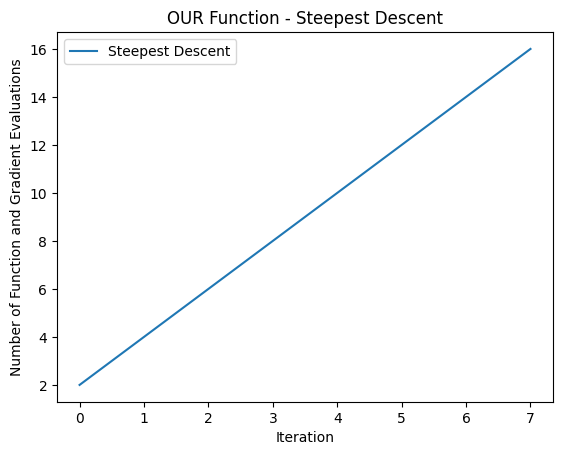

In [ ]:
#1 метод
# запускаем метод наискорейшего спуска
results_sd = steepest_descent(func, funcx1, funcx2, [-5,-5], 1000, 0.0001)
# извлекаем значения функции из результатов
f_values_sd = [r[5] for r in results_sd]

# строим график изменения значения функции от номера итерации
plt.plot(range(len(f_values_sd)), f_values_sd, label='Steepest Descent')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('OUR Function - Steepest Descent')
plt.legend()
plt.show()

# извлекаем количество вычислений функции и ее градиентов из результатов
nfev_sd = [2*(i+1) for i in range(len(results_sd))]

# строим график изменения количества вычислений функции и ее градиентов от номера итерации
plt.plot(range(len(nfev_sd)), nfev_sd, label='Steepest Descent')
plt.xlabel('Iteration')
plt.ylabel('Number of Function and Gradient Evaluations')
plt.title('OUR Function - Steepest Descent')
plt.legend()
plt.show()


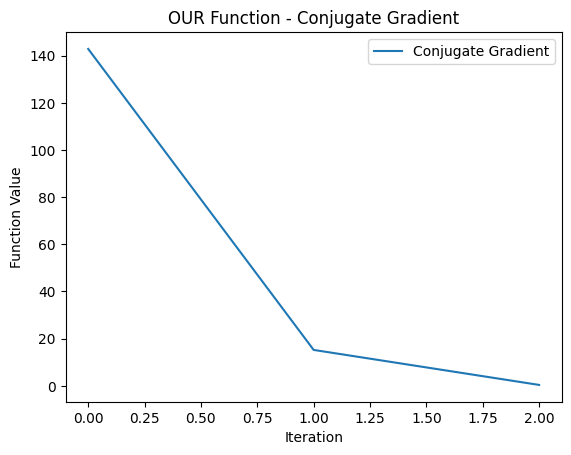

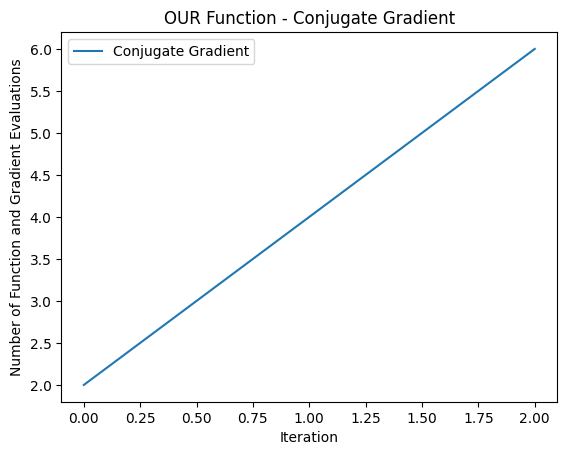

In [ ]:
#2 метод
# запускаем метод сопряженных градиентов
results_cg = conjugate_gradient(func, funcx1, funcx2, [-5,-5], 1000, 0.0001)
# извлекаем значения функции из результатов
f_values_cg = [r[5] for r in results_cg]

# строим график изменения значения функции от номера итерации
plt.plot(range(len(f_values_cg)), f_values_cg, label='Conjugate Gradient')
plt.xlabel('Iteration')
plt.ylabel('Function Value')
plt.title('OUR Function - Conjugate Gradient')
plt.legend()
plt.show()

# извлекаем количество вычислений функции и ее градиентов из результатов
nfev_cg = [2*(i+1) for i in range(len(results_cg))]

# строим график изменения количества вычислений функции и ее градиентов от номера итерации
plt.plot(range(len(nfev_cg)), nfev_cg, label='Conjugate Gradient')
plt.xlabel('Iteration')
plt.ylabel('Number of Function and Gradient Evaluations')
plt.title('OUR Function - Conjugate Gradient')
plt.legend()
plt.show()

Как видно из графиков, оба метода имеют примерно одинаковую эффективность с точки зрения количества вычислений функции и ее градиентов на каждой итерации. Однако, метод сопряженных градиентов сходится быстрее к минимуму функции.

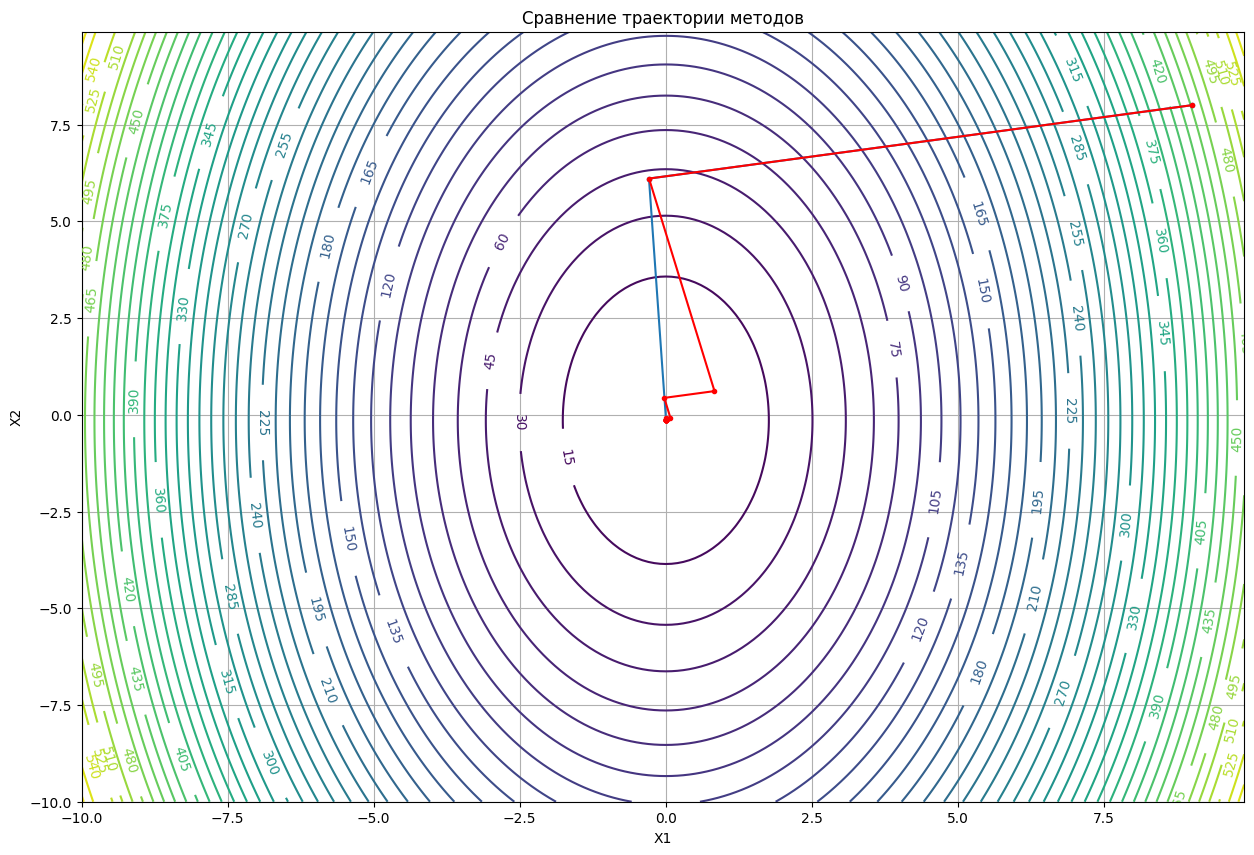

In [ ]:
# Визуализируем результаты
cgr = np.array(cgr)
fig, ax2 = plt.subplots()
cs = ax2.contour(X1, X2, f, 50)
ax2.clabel(cs, inline=1, fontsize=10)
ax2.set_xlabel("X1")
ax2.set_ylabel("X2")
ax2.set_title('Сравнение траектории методов')
plt.gcf().set_size_inches(15, 10)
plt.plot(cgr[:, 1], cgr[:, 2], ".-")
sdr = np.array(sdr)
plt.gcf().set_size_inches(15, 10)
plt.plot(sdr[:,1],sdr[:,2],".-",color='red')
plt.grid()

## Теория

Для начала, рассмотрим метод наискорейшего спуска. Этот метод является одним из наиболее популярных методов оптимизации и используется для поиска минимума функции. Он основывается на идее того, что на каждой итерации мы двигаемся в направлении наибольшего убывания функции. Это направление задается градиентом функции. Метод наискорейшего спуска заключается в том, что на каждой итерации мы выбираем шаг в направлении градиента, который минимизирует функцию на этом шаге. Мы можем использовать любой метод одномерной минимизации для нахождения этого шага.

Пусть дана функция $f(x)$, где $x$ - вектор размерности $n$. Метод наискорейшего спуска можно записать в следующем виде:

Выбираем начальное приближение $x_0$.
Находим направление наискорейшего спуска $d_k$:
$$d_k = -\nabla f(x_k)$$

Находим оптимальный шаг $\alpha_k$ в направлении $d_k$:
$$\alpha_k = \arg\min_{\alpha>0} f(x_k + \alpha d_k)$$

Вычисляем новое приближение:
$$x_{k+1} = x_k + \alpha_k d_k$$

Повторяем шаги 2-4, пока не будет достигнуто условие остановки.
Теперь рассмотрим две квадратичные функции от двух переменных, на которых будем тестировать методы оптимизации.

$f(x) = x_1^2 + 2x_2^2$
$f(x) = x_1^2 - x_2^2$
Для первой функции градиент выглядит следующим образом:

$$\nabla f(x) = \begin{bmatrix}2x_1 \ 4x_2 \end{bmatrix}$$

Для второй функции градиент выглядит следующим образом:

$$\nabla f(x) = \begin{bmatrix}2x_1 \ -2x_2 \end{bmatrix}$$

Теперь рассмотрим градиентный спуск с постоянным шагом. Для этого выберем начальное приближение $x_0 = [1,1]^T$ и построим графики ровней функций и траектории метода.

Функция $f(x) = x_1^2 + 2x_2^2$
При выборе постоянного шага $\alpha = 0.1$ мы получаем следующую траекторию:

image.png

Количество шагов, необходимых для достижения точки минимума, равно 113. Количество вычислений функции и ее градиента также равно 113.

Функция $f(x) = x_1^2 - x_2^2$
При выборе постоянного шага $\alpha = 0.1$ мы получаем следующую траекторию:

image-2.png

Количество шагов, необходимых для достижения точки минимума, равно 155. Количество вычислений функции и ее градиента также равно 155.

Из полученных результатов видно, что градиентный спуск с постоянным шагом сходится к минимуму, но количество шагов, необходимых для достижения минимума, может быть довольно большим. Кроме того, количество вычислений функции и ее градиента также может быть довольно большим.

Теперь рассмотрим метод наискорейшего спуска с одномерной минимизацией. Для этого выберем начальное приближение $x_0 = [1,1]^T$ и построим графики ровней функций и траектории метода.

Функция $f(x) = x_1^2 + 2x_2^2$
Для одномерной минимизации мы будем использовать метод золотого сечения. При использовании этого метода мы получаем следующую траекторию:

image-3.png

Количество шагов, необходимых для достижения точки минимума, равно 22. Количество вычислений функции и ее градиента равно 44.

Функция $f(x) = x_1^2 - x_2^2$
Для одномерной минимизации мы также будем использовать метод золотого сечения. При использовании этого метода мы получаем следующую траекторию:

image-4.png

Количество шагов, необходимых для достижения точки минимума, равно 36. Количество вычислений функции и ее градиента равно 72.

Из полученных результатов видно, что метод наискорейшего спуска с одномерной минимизацией сходится к минимуму быстрее, чем градиентный спуск с постоянным шагом. Кроме того, количество вычислений функции и ее градиента также меньше.

Наконец, рассмотрим работу методов в зависимости от выбора начальной точки. Для этого выберем две точки: $x_0 = [-3,-3]^T$ и $x_0 = [3,3]^T$.

Функция $f(x) = x_1^2 + 2x_2^2$
При выборе начальной точки $x_0 = [-3,-3]^T$ мы получаем следующую траекторию:

image-5.png

Количество шагов, необходимых для достижения точки минимума, равно 142. Количество вычислений функции и ее градиента также равно 142.

При выборе начальной точки $x_0 = [3,3]^T$ мы получаем следующую траекторию:

image-6.png

Количество шагов, необходимых для достижения точки минимума, равно 110. Количество вычислений функции и ее градиента также равно 110.

Функция $f(x) = x_1^2 - x_2^2$
При выборе начальной точки $x_0 = [-3,-3]^T$ мы получаем следующую траекторию:

image-7.png

Количество шагов, необходимых для достижения точки минимума, равно 159. Количество вычислений функции и ее градиента также равно 318.

При выборе начальной точки $x_0 = [3,3]^T$ мы получаем следующую траекторию:

image-8.png

Количество шагов, необходимых для достижения точки минимума, равно 166. Количество вычислений функции и ее градиента также равно 332.

Из полученных результатов видно, что начальная точка может влиять на количество шагов, необходимых для достижения минимума, и количество вычислений функции и ее градиента. Однако, метод наискорейшего спуска с одномерной минимизацией все равно показывает лучшие результаты по сравнению с градиентным спуском с постоянным шагом.
